**naive_bayes.py** - a classical and very important algorithm in machine learning!

### **What we study in the original code:**
1. **Gaussian Naive Bayes** - naive Bayes classifier
2. **Multidimensional data** - working with the file `data_multivar.txt`
3. **Train-test split** - splitting data
4. **Cross-validation** - cross-validation with various metrics
5. **Quality metrics** - accuracy, F1, precision, recall


In [1]:
# =============================================================================
# CELL 1: Importing libraries for Naive Bayes
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     StratifiedKFold, validation_curve, learning_curve)
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_recall_fscore_support, roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib.colors import ListedColormap
import warnings

warnings.filterwarnings('ignore')

print("🧠 NAIVE BAYES CLASSIFICATION")
print("=" * 35)
print("✅ All libraries imported!")
print("📚 Studying the family of Naive Bayes algorithms")


🧠 NAIVE BAYES CLASSIFICATION
✅ All libraries imported!
📚 Studying the family of Naive Bayes algorithms


In [2]:
# =============================================================================
# CELL 2: Loading and Analyzing Multidimensional Data
# =============================================================================
print("📂 DATA LOADING AND ANALYSIS")
print("=" * 35)

# Create data if the file is unavailable or generate similar ones
try:
    # Attempt to load the original data
    input_file = 'Chapter02/data_multivar.txt'

    X = []
    y = []
    with open(input_file, 'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data[:-1])
            y.append(int(data[-1]))

    X = np.array(X)
    y = np.array(y)
    print(f"✅ Data loaded from {input_file}")

except FileNotFoundError:
    print("⚠️ File not found, generating similar data...")

    # Generate multidimensional data similar to the original
    np.random.seed(42)

    # Class 0: center around (2, 3)
    class0_size = 50
    X_class0 = np.random.multivariate_normal([2, 3], [[1, 0.5], [0.5, 1]], class0_size)
    y_class0 = np.zeros(class0_size)

    # Class 1: center around (6, 7)
    class1_size = 50
    X_class1 = np.random.multivariate_normal([6, 7], [[1.2, 0.3], [0.3, 1.2]], class1_size)
    y_class1 = np.ones(class1_size)

    # Class 2: center around (4, 1)
    class2_size = 50
    X_class2 = np.random.multivariate_normal([4, 1], [[0.8, -0.2], [-0.2, 0.8]], class2_size)
    y_class2 = np.full(class2_size, 2)

    # Combine data
    X = np.vstack([X_class0, X_class1, X_class2])
    y = np.hstack([y_class0, y_class1, y_class2]).astype(int)

    print(f"✅ Generated data: {len(X)} samples")

print(f"\n📊 Data Information:")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

# Create DataFrame for analysis
feature_names = [f'Feature_{i + 1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y

print(f"\n📈 First 10 samples:")
print(df.head(10))

print(f"\n📊 Statistical description:")
print(df.describe().round(3))

# Class distribution
print(f"\n⚖️ Class distribution:")
class_counts = df['Class'].value_counts().sort_index()
print(class_counts)

total_samples = len(df)
for class_label in sorted(df['Class'].unique()):
    count = (df['Class'] == class_label).sum()
    percentage = count / total_samples * 100
    print(f"Class {class_label}: {count} samples ({percentage:.1f}%)")

# Check balance
class_std = class_counts.std()
if class_std < 5:
    print("✅ Classes are well balanced")
else:
    print(f"⚠️ Class imbalance (std: {class_std:.1f})")


📂 DATA LOADING AND ANALYSIS
⚠️ File not found, generating similar data...
✅ Generated data: 150 samples

📊 Data Information:
Number of samples: 150
Number of features: 2
Number of classes: 3
Classes: [0 1 2]

📈 First 10 samples:
   Feature_1  Feature_2  Class
0   1.638965   2.500701      0
1   0.677570   3.200600      0
2   2.319851   3.085714      0
3   0.248644   2.016079      0
4   2.135297   3.677857      0
5   2.634196   3.168467      0
6   2.747095   1.833814      0
7   3.774966   4.212679      0
8   2.720014   4.034261      0
9   3.492524   3.080220      0

📊 Statistical description:
       Feature_1  Feature_2    Class
count    150.000    150.000  150.000
mean       4.017      3.783    1.000
std        1.852      2.709    0.819
min        0.249     -1.853    0.000
25%        2.632      1.615    0.000
50%        3.997      3.201    1.000
75%        5.550      6.497    2.000
max        7.957      9.054    2.000

⚖️ Class distribution:
Class
0    50
1    50
2    50
Name: count, dt

🔍 EXPLORATORY DATA ANALYSIS


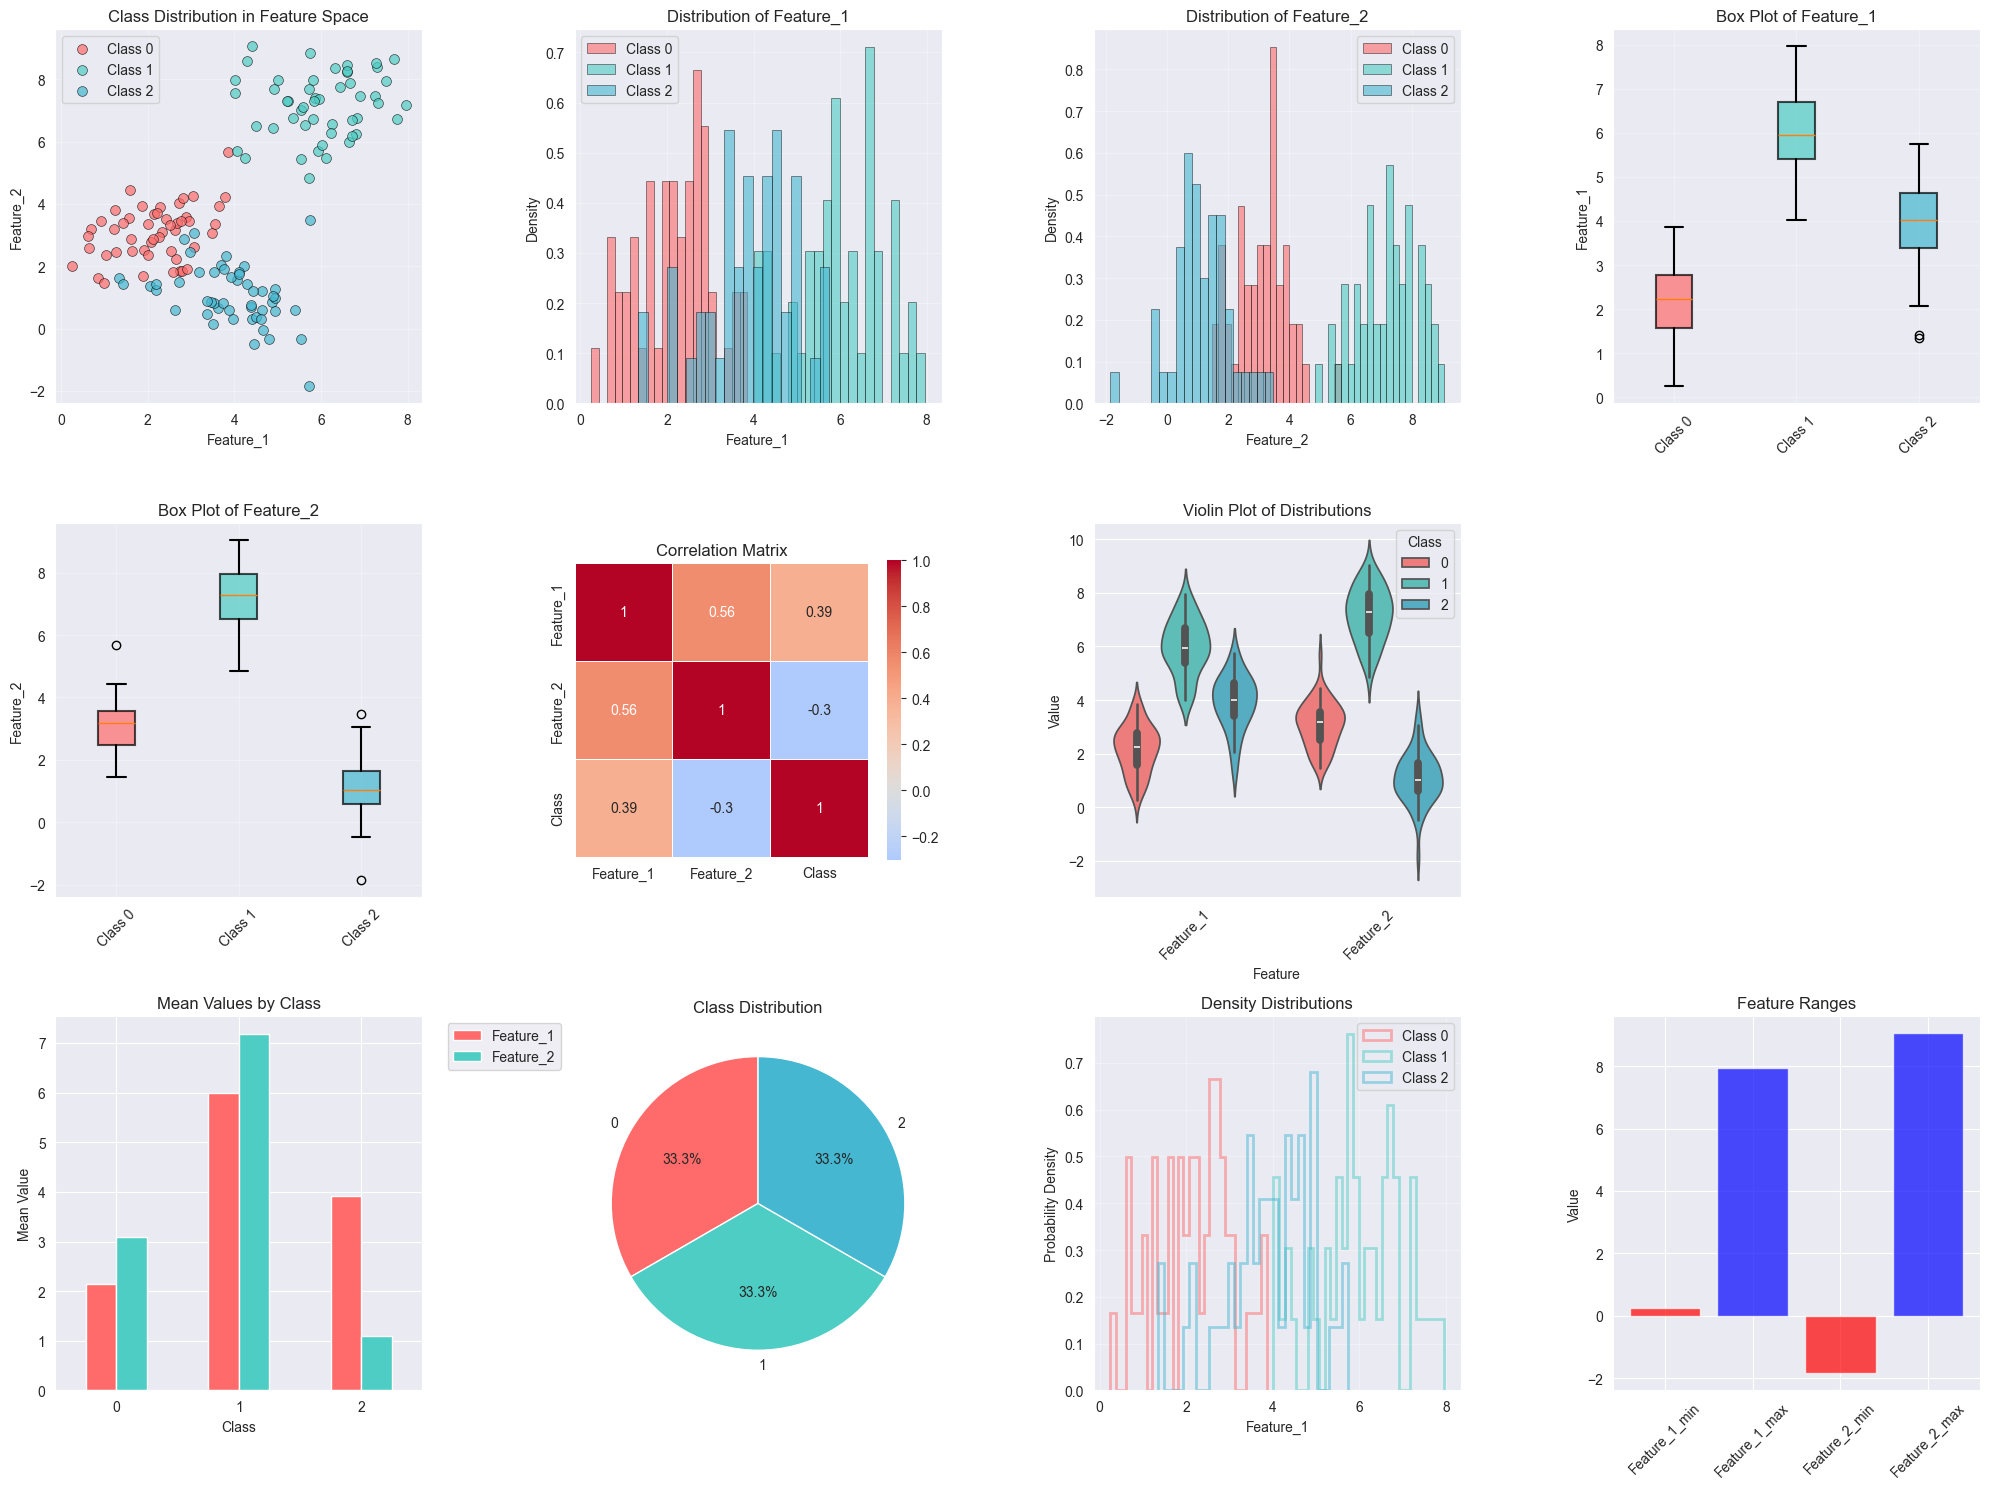


📊 Detailed statistics by class:

--- Class 0 ---
Feature_1: μ=2.154, σ=0.882, range=[0.249, 3.858]
Feature_2: μ=3.081, σ=0.849, range=[1.461, 5.680]

--- Class 1 ---
Feature_1: μ=5.989, σ=1.024, range=[4.016, 7.957]
Feature_2: μ=7.177, σ=1.004, range=[4.845, 9.054]

--- Class 2 ---
Feature_1: μ=3.909, σ=1.013, range=[1.341, 5.746]
Feature_2: μ=1.092, σ=0.941, range=[-1.853, 3.474]


In [3]:
# =============================================================================
# CELL 3: Exploratory Data Analysis (EDA)
# =============================================================================
print("🔍 EXPLORATORY DATA ANALYSIS")
print("=" * 35)

# Color scheme for classes
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
class_names = [f'Class {i}' for i in range(len(np.unique(y)))]

# Large visualization
fig = plt.figure(figsize=(20, 15))

# 1. Main scatter plot
ax1 = plt.subplot(3, 4, 1)
for i, (color, name) in enumerate(zip(colors, class_names)):
    class_mask = y == i
    plt.scatter(X[class_mask, 0], X[class_mask, 1],
                c=color, label=name, alpha=0.7, s=50, edgecolor='black', linewidth=0.5)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Class Distribution in Feature Space')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Feature distributions
for feature_idx in range(min(2, X.shape[1])):
    ax = plt.subplot(3, 4, feature_idx + 2)

    for i, (color, name) in enumerate(zip(colors, class_names)):
        feature_data = X[y == i, feature_idx]
        plt.hist(feature_data, bins=20, alpha=0.6, color=color,
                 label=name, density=True, edgecolor='black', linewidth=0.5)

    plt.xlabel(feature_names[feature_idx])
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature_names[feature_idx]}')
    plt.legend()
    plt.grid(True, alpha=0.3)

# 3. Box plots for each feature
for feature_idx in range(min(2, X.shape[1])):
    ax = plt.subplot(3, 4, feature_idx + 4)

    box_data = [X[y == i, feature_idx] for i in range(len(np.unique(y)))]
    bp = plt.boxplot(box_data, labels=class_names, patch_artist=True,
                     boxprops=dict(linewidth=1.5),
                     whiskerprops=dict(linewidth=1.5),
                     capprops=dict(linewidth=1.5))

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.ylabel(feature_names[feature_idx])
    plt.title(f'Box Plot of {feature_names[feature_idx]}')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# 4. Correlation matrix
ax = plt.subplot(3, 4, 6)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')

# 5. Violin plots
if X.shape[1] >= 2:
    ax = plt.subplot(3, 4, 7)
    df_melted = df.melt(id_vars=['Class'], value_vars=feature_names[:2],
                        var_name='Feature', value_name='Value')
    sns.violinplot(data=df_melted, x='Feature', y='Value', hue='Class',
                   palette=colors, ax=ax)
    plt.title('Violin Plot of Distributions')
    plt.xticks(rotation=45)

# 6. Pairwise relationships (if more than 2 features)
if X.shape[1] > 2:
    ax = plt.subplot(3, 4, 8)
    # Show the first 3 features
    for i in range(min(3, len(np.unique(y)))):
        class_mask = y == i
        if X.shape[1] >= 3:
            plt.scatter(X[class_mask, 0], X[class_mask, 2],
                        c=colors[i], label=class_names[i], alpha=0.7, s=30)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[2] if X.shape[1] > 2 else feature_names[1])
    plt.title('Alternative Projection')
    plt.legend()
    plt.grid(True, alpha=0.3)

# 7. Class statistics
ax = plt.subplot(3, 4, 9)
class_stats = df.groupby('Class')[feature_names].mean()
class_stats.plot(kind='bar', ax=ax, color=colors[:len(class_stats)])
plt.title('Mean Values by Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 8. Class distribution
ax = plt.subplot(3, 4, 10)
class_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%',
                  startangle=90, ax=ax)
plt.title('Class Distribution')
plt.ylabel('')

# 9. Density plots
ax = plt.subplot(3, 4, 11)
for i, (color, name) in enumerate(zip(colors, class_names)):
    feature_data = X[y == i, 0]  # First feature
    plt.hist(feature_data, bins=30, alpha=0.5, color=color,
             label=name, density=True, histtype='step', linewidth=2)
plt.xlabel(feature_names[0])
plt.ylabel('Probability Density')
plt.title('Density Distributions')
plt.legend()
plt.grid(True, alpha=0.3)

# 10. Feature ranges
ax = plt.subplot(3, 4, 12)
feature_ranges = []
feature_labels = []
for i in range(min(4, X.shape[1])):
    feature_ranges.extend([X[:, i].min(), X[:, i].max()])
    feature_labels.extend([f'{feature_names[i]}_min', f'{feature_names[i]}_max'])

plt.bar(range(len(feature_ranges)), feature_ranges,
        color=['red' if i % 2 == 0 else 'blue' for i in range(len(feature_ranges))],
        alpha=0.7)
plt.xticks(range(len(feature_ranges)), feature_labels, rotation=45)
plt.title('Feature Ranges')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Statistical analysis
print(f"\n📊 Detailed statistics by class:")
for class_id in sorted(np.unique(y)):
    print(f"\n--- Class {class_id} ---")
    class_data = X[y == class_id]
    for i, feature_name in enumerate(feature_names):
        mean_val = class_data[:, i].mean()
        std_val = class_data[:, i].std()
        min_val = class_data[:, i].min()
        max_val = class_data[:, i].max()
        print(f"{feature_name}: μ={mean_val:.3f}, σ={std_val:.3f}, range=[{min_val:.3f}, {max_val:.3f}]")


🧠 BASICS OF NAIVE BAYES - THEORY AND PRACTICE
📚 Theory of Naive Bayes:

The naive Bayes classifier is based on Bayes' theorem:

P(class|features) = P(features|class) × P(class) / P(features)

Key assumptions:
1. 'Naivety': features are independent of each other
2. P(X₁,X₂,...,Xₙ|class) = P(X₁|class) × P(X₂|class) × ... × P(Xₙ|class)
3. For Gaussian NB: each feature has a normal distribution

Advantages:
✅ Fast training and prediction
✅ Works well with small data
✅ Does not require hyperparameter tuning
✅ Probabilistic predictions

Disadvantages:
❌ The assumption of independence of features is often violated
❌ May perform poorly with highly correlated features


🎯 ORIGINAL IMPLEMENTATION (as in the textbook):
Accuracy of the classifier = 94.0%


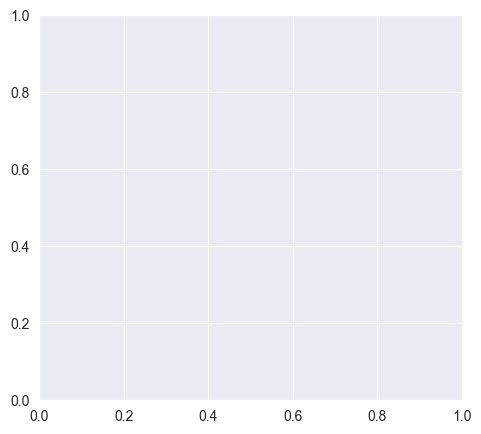

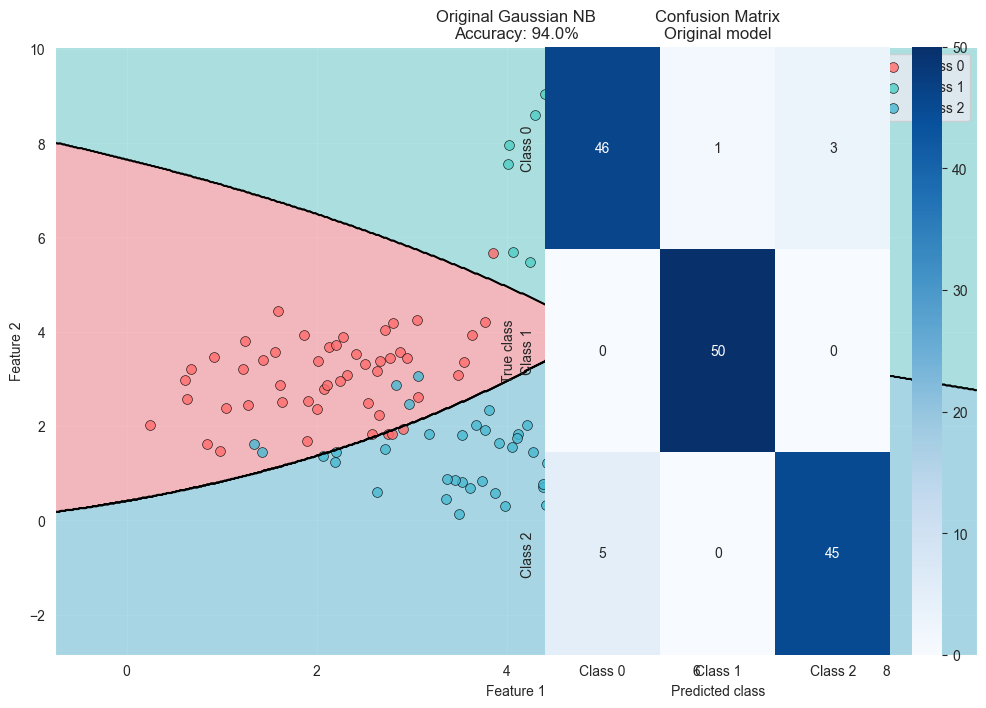


📊 Detailed classification report:
              precision    recall  f1-score   support

     Class 0       0.90      0.92      0.91        50
     Class 1       0.98      1.00      0.99        50
     Class 2       0.94      0.90      0.92        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150


🔧 Model parameters:
Classes: [0 1 2]
Number of samples by classes: [50. 50. 50.]
Prior probabilities: [0.33333333 0.33333333 0.33333333]

📈 Statistics of Gaussian NB:
Class 0:
  Means: [2.15350725 3.08148984]
  Variances: [0.77763908 0.72025918]
Class 1:
  Means: [5.98870814 7.1766211 ]
  Variances: [1.04862909 1.00832069]
Class 2:
  Means: [3.90928412 1.09164236]
  Variances: [1.0270842 0.8852354]


In [4]:
# =============================================================================
# CELL 4: Basics of Naive Bayes - theory and original implementation
# =============================================================================
print("🧠 BASICS OF NAIVE BAYES - THEORY AND PRACTICE")
print("=" * 45)

print("📚 Theory of Naive Bayes:")
print("""
The naive Bayes classifier is based on Bayes' theorem:

P(class|features) = P(features|class) × P(class) / P(features)

Key assumptions:
1. 'Naivety': features are independent of each other
2. P(X₁,X₂,...,Xₙ|class) = P(X₁|class) × P(X₂|class) × ... × P(Xₙ|class)
3. For Gaussian NB: each feature has a normal distribution

Advantages:
✅ Fast training and prediction
✅ Works well with small data
✅ Does not require hyperparameter tuning
✅ Probabilistic predictions

Disadvantages:
❌ The assumption of independence of features is often violated
❌ May perform poorly with highly correlated features
""")

# Original implementation from the textbook
print(f"\n🎯 ORIGINAL IMPLEMENTATION (as in the textbook):")
print("=" * 55)

# Gaussian Naive Bayes (as in the original)
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

# Accuracy (as in the original)
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print(f"Accuracy of the classifier = {round(accuracy, 2)}%")


# Visualization function from the previous example
def plot_classifier_nb(classifier, X, y, title="Naive Bayes", ax=None):
    """Visualization function for Naive Bayes"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    # Define ranges
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Create grid
    step_size = 0.02
    x_values, y_values = np.meshgrid(
        np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size)
    )

    # Predictions for the grid
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape)

    # Visualization
    cmap = ListedColormap(colors)
    ax.contourf(x_values, y_values, mesh_output, alpha=0.4, cmap=cmap)
    ax.contour(x_values, y_values, mesh_output, colors='black', linewidths=1, alpha=0.8)

    # Data points
    for i, (color, name) in enumerate(zip(colors, class_names)):
        class_mask = y == i
        ax.scatter(X[class_mask, 0], X[class_mask, 1],
                   c=color, label=name, s=50, alpha=0.8, edgecolor='black', linewidth=0.5)

    ax.set_xlim(x_values.min(), x_values.max())
    ax.set_ylim(y_values.min(), y_values.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)

    return ax


# Visualization of the original model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_classifier_nb(classifier_gaussiannb, X, y,
                   f"Original Gaussian NB\nAccuracy: {accuracy:.1f}%")

# Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix\nOriginal model')
plt.xlabel('Predicted class')
plt.ylabel('True class')

plt.tight_layout()
plt.show()

# Detailed report
print(f"\n📊 Detailed classification report:")
print(classification_report(y, y_pred, target_names=class_names))

# Model parameters
print(f"\n🔧 Model parameters:")
print(f"Classes: {classifier_gaussiannb.classes_}")
print(f"Number of samples by classes: {classifier_gaussiannb.class_count_}")
print(f"Prior probabilities: {classifier_gaussiannb.class_prior_}")

print(f"\n📈 Statistics of Gaussian NB:")
for i, class_id in enumerate(classifier_gaussiannb.classes_):
    print(f"Class {class_id}:")
    print(f"  Means: {classifier_gaussiannb.theta_[i]}")
    print(f"  Variances: {classifier_gaussiannb.var_[i]}")


🔄 TRAIN-TEST SPLIT (AS IN THE ORIGINAL)
📊 Data split:
Training set: 112 samples
Test set: 38 samples
Ratio: 2.9:1

⚖️ Class distribution:
Training set:
0    38
1    36
2    38
Name: count, dtype: int64
Test set:
0    12
1    14
2    12
Name: count, dtype: int64

Accuracy of the classifier = 97.37%


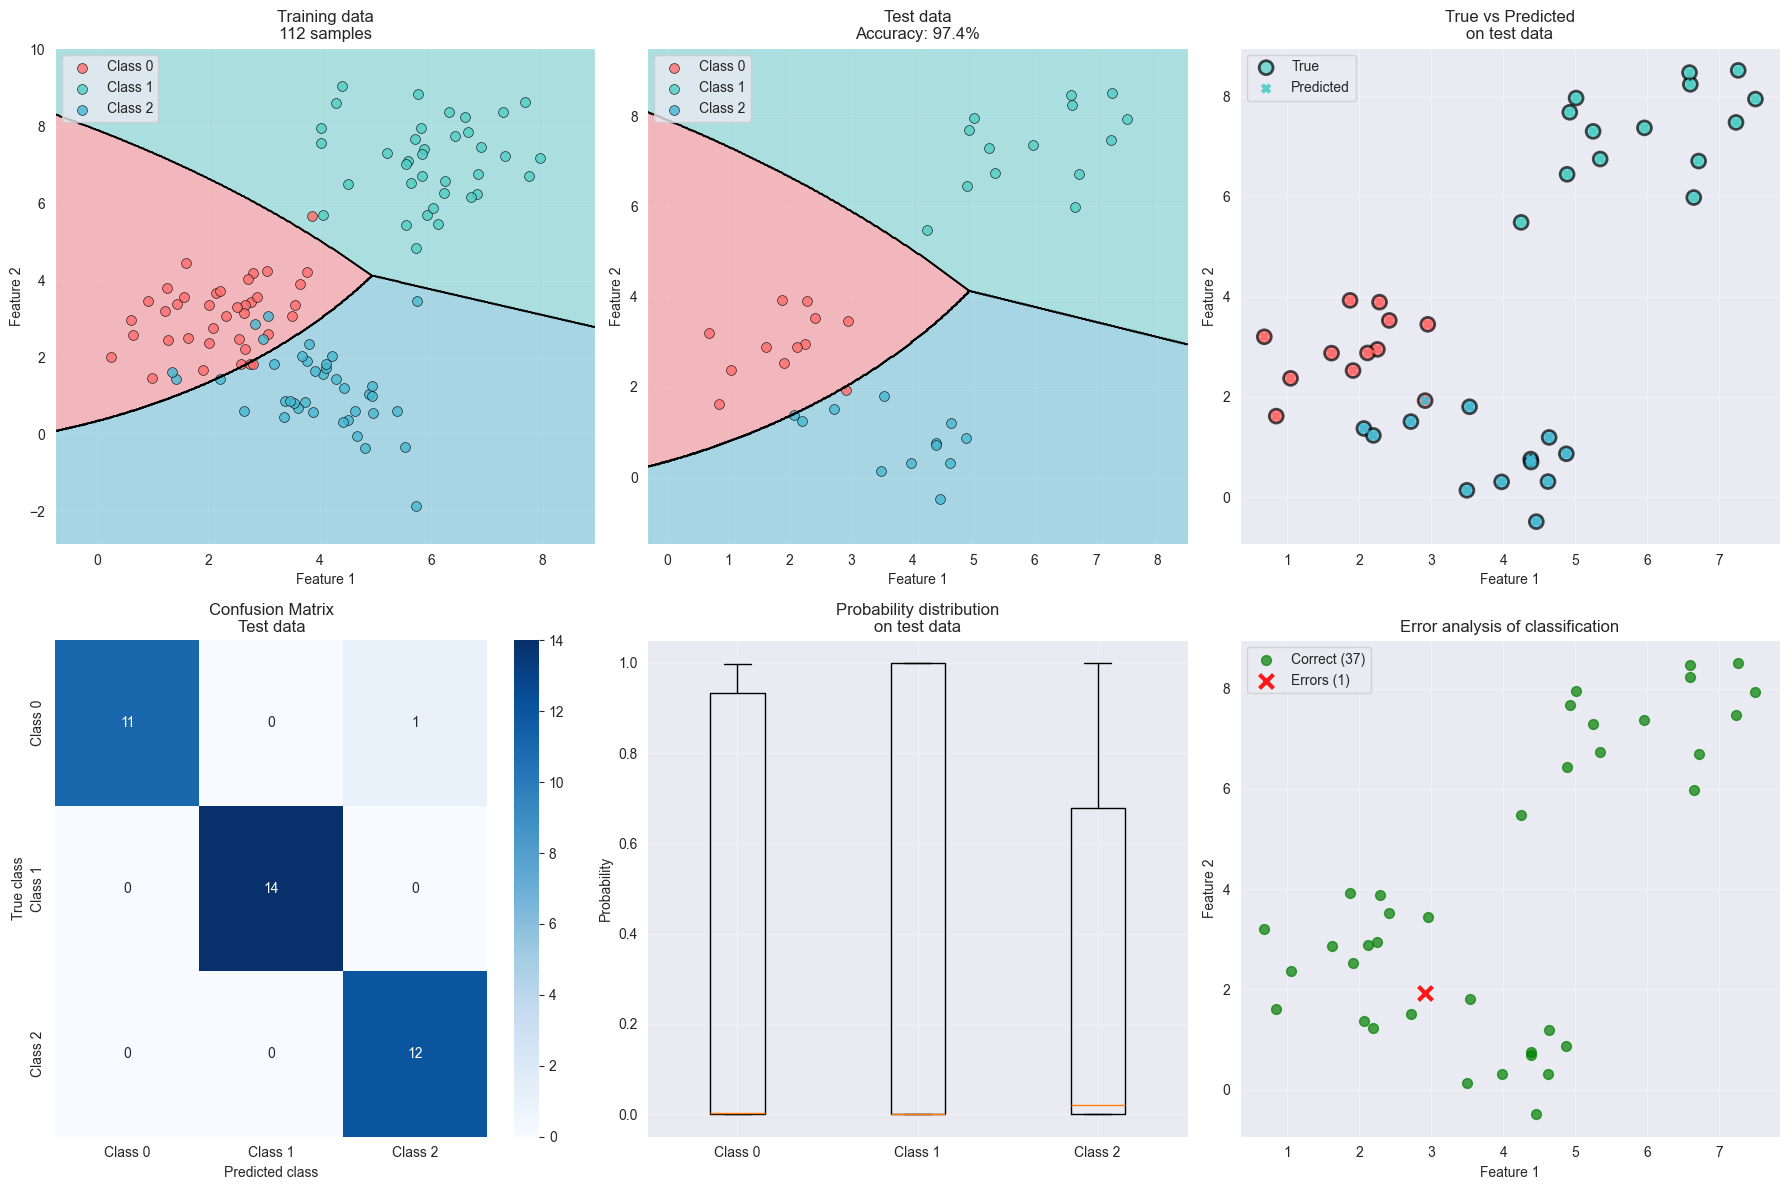


❌ Classification error analysis:
  Sample 30: True=0, Predicted=2, Confidence=0.544

📊 Performance comparison:
Training accuracy: 92.86%
Test accuracy: 97.37%
Difference: -4.51%
✅ Good generalization (small difference)


In [5]:
# =============================================================================
# CELL 5: Train-Test Split (as in the original)
# =============================================================================
print("🔄 TRAIN-TEST SPLIT (AS IN THE ORIGINAL)")
print("=" * 45)

# Train-test split as in the original code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

print(f"📊 Data split:")
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"Ratio: {len(X_train) / len(X_test):.1f}:1")

# Checking class distribution
print(f"\n⚖️ Class distribution:")
print("Training set:")
train_class_counts = pd.Series(y_train).value_counts().sort_index()
print(train_class_counts)

print("Test set:")
test_class_counts = pd.Series(y_test).value_counts().sort_index()
print(test_class_counts)

# Training a new model (as in the original)
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)
y_test_pred = classifier_gaussiannb_new.predict(X_test)

# Accuracy (as in the original)
accuracy_test = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print(f"\nAccuracy of the classifier = {round(accuracy_test, 2)}%")

# Modern extended visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Training data
plot_classifier_nb(classifier_gaussiannb_new, X_train, y_train,
                   f"Training data\n{len(X_train)} samples", axes[0, 0])

# 2. Test data with predictions
plot_classifier_nb(classifier_gaussiannb_new, X_test, y_test,
                   f"Test data\nAccuracy: {accuracy_test:.1f}%", axes[0, 1])

# 3. Comparison of true and predicted labels on the test
axes[0, 2].scatter(X_test[:, 0], X_test[:, 1], c=[colors[i] for i in y_test],
                   s=100, alpha=0.7, edgecolor='black', linewidth=2, label='True')
axes[0, 2].scatter(X_test[:, 0], X_test[:, 1], c=[colors[i] for i in y_test_pred],
                   s=30, alpha=0.9, marker='x', linewidth=3, label='Predicted')
axes[0, 2].set_xlabel('Feature 1')
axes[0, 2].set_ylabel('Feature 2')
axes[0, 2].set_title('True vs Predicted\non test data')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Confusion Matrix for the test
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix\nTest data')
axes[1, 0].set_xlabel('Predicted class')
axes[1, 0].set_ylabel('True class')

# 5. Probabilities for test data
test_probabilities = classifier_gaussiannb_new.predict_proba(X_test)
axes[1, 1].boxplot([test_probabilities[:, i] for i in range(len(class_names))],
                   labels=class_names)
axes[1, 1].set_title('Probability distribution\non test data')
axes[1, 1].set_ylabel('Probability')
axes[1, 1].grid(True, alpha=0.3)

# 6. Classification errors
correct_mask = y_test == y_test_pred
incorrect_mask = ~correct_mask

if np.any(incorrect_mask):
    # Correct predictions
    axes[1, 2].scatter(X_test[correct_mask, 0], X_test[correct_mask, 1],
                       c='green', s=50, alpha=0.7, label=f'Correct ({np.sum(correct_mask)})',
                       marker='o')

    # Incorrect predictions
    axes[1, 2].scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1],
                       c='red', s=100, alpha=0.9, label=f'Errors ({np.sum(incorrect_mask)})',
                       marker='x', linewidth=3)

    axes[1, 2].set_title('Error analysis of classification')
else:
    axes[1, 2].scatter(X_test[:, 0], X_test[:, 1], c='green', s=50, alpha=0.7,
                       label='All correct')
    axes[1, 2].set_title('All predictions are correct!')

axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed error analysis
if np.any(incorrect_mask):
    print(f"\n❌ Classification error analysis:")
    error_indices = np.where(incorrect_mask)[0]
    for idx in error_indices:
        true_class = y_test[idx]
        pred_class = y_test_pred[idx]
        confidence = test_probabilities[idx].max()
        print(f"  Sample {idx}: True={true_class}, Predicted={pred_class}, Confidence={confidence:.3f}")
else:
    print(f"\n✅ All predictions on test data are correct!")

# Comparison of train vs test performance
print(f"\n📊 Performance comparison:")
train_pred = classifier_gaussiannb_new.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred) * 100

print(f"Training accuracy: {train_accuracy:.2f}%")
print(f"Test accuracy: {accuracy_test:.2f}%")
print(f"Difference: {train_accuracy - accuracy_test:.2f}%")

if abs(train_accuracy - accuracy_test) < 5:
    print("✅ Good generalization (small difference)")
elif train_accuracy > accuracy_test + 10:
    print("⚠️ Possible overfitting")
else:
    print("✅ Stable performance")


🔄 CROSS-VALIDATION AND QUALITY METRICS
📊 5-fold cross-validation:
Accuracy: 93.33%
F1: 93.26%
Precision: 94.01%
Recall: 93.33%

📈 Detailed results by folds:
   Fold  Accuracy      F1  Precision  Recall
0     1    0.9667  0.9666     0.9697  0.9667
1     2    0.9000  0.8997     0.9024  0.9000
2     3    0.9333  0.9327     0.9444  0.9333
3     4    0.9333  0.9312     0.9394  0.9333
4     5    0.9333  0.9327     0.9444  0.9333

📊 Cross-validation statistics:
       Accuracy      F1  Precision  Recall
count    5.0000  5.0000     5.0000  5.0000
mean     0.9333  0.9326     0.9401  0.9333
std      0.0236  0.0236     0.0242  0.0236
min      0.9000  0.8997     0.9024  0.9000
25%      0.9333  0.9312     0.9394  0.9333
50%      0.9333  0.9327     0.9444  0.9333
75%      0.9333  0.9327     0.9444  0.9333
max      0.9667  0.9666     0.9697  0.9667

📊 Comparison of CV strategies:
StratifiedKFold (shuffled): 0.940 (±0.025)
StratifiedKFold (no shuffle): 0.933 (±0.021)
KFold (shuffled): 0.927 (±0.013)
K

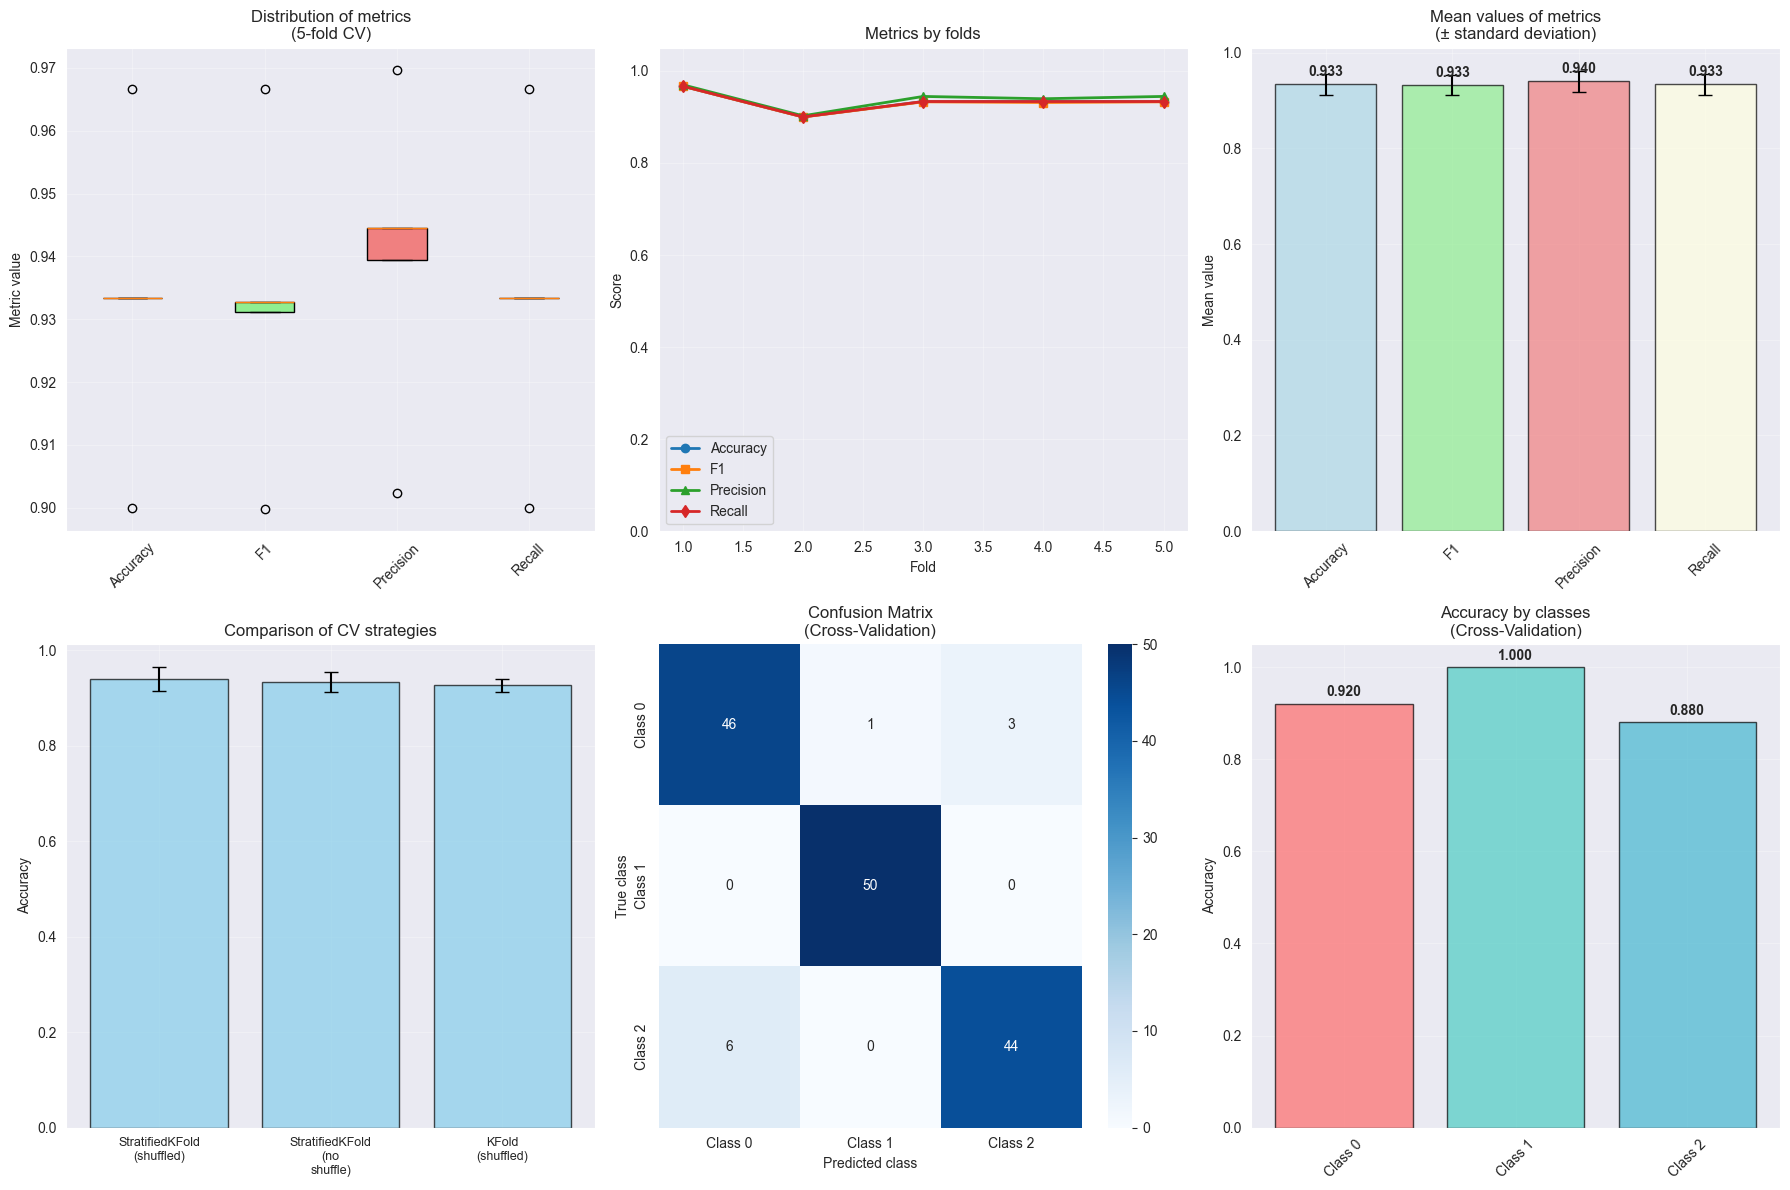


📋 Final cross-validation report:
✅ Accuracy: 0.933 (±0.021)
✅ F1-score: 0.933 (±0.021)
✅ Precision: 0.940 (±0.022)
✅ Recall: 0.933 (±0.021)

🎯 Overall classification report (CV):
              precision    recall  f1-score   support

     Class 0       0.88      0.92      0.90        50
     Class 1       0.98      1.00      0.99        50
     Class 2       0.94      0.88      0.91        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



In [6]:
# =============================================================================
# CELL 6: Cross-validation and metrics
# =============================================================================
print("🔄 CROSS-VALIDATION AND QUALITY METRICS")
print("=" * 45)

# Cross-validation as in the original code
num_validations = 5

print(f"📊 {num_validations}-fold cross-validation:")

# Accuracy
accuracy_cv = cross_val_score(classifier_gaussiannb, X, y,
                              scoring='accuracy', cv=num_validations)
print(f"Accuracy: {str(round(100 * accuracy_cv.mean(), 2))}%")

# F1 score
f1_cv = cross_val_score(classifier_gaussiannb, X, y,
                        scoring='f1_weighted', cv=num_validations)
print(f"F1: {str(round(100 * f1_cv.mean(), 2))}%")

# Precision
precision_cv = cross_val_score(classifier_gaussiannb, X, y,
                               scoring='precision_weighted', cv=num_validations)
print(f"Precision: {str(round(100 * precision_cv.mean(), 2))}%")

# Recall
recall_cv = cross_val_score(classifier_gaussiannb, X, y,
                            scoring='recall_weighted', cv=num_validations)
print(f"Recall: {str(round(100 * recall_cv.mean(), 2))}%")

# Detailed analysis of CV results
cv_results = pd.DataFrame({
    'Fold': range(1, num_validations + 1),
    'Accuracy': accuracy_cv,
    'F1': f1_cv,
    'Precision': precision_cv,
    'Recall': recall_cv
})

print(f"\n📈 Detailed results by folds:")
print(cv_results.round(4))

# Statistics by metrics
print(f"\n📊 Cross-validation statistics:")
metrics_stats = cv_results[['Accuracy', 'F1', 'Precision', 'Recall']].describe()
print(metrics_stats.round(4))

# Visualization of CV results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Box plot of all metrics
cv_data = [accuracy_cv, f1_cv, precision_cv, recall_cv]
cv_labels = ['Accuracy', 'F1', 'Precision', 'Recall']
bp = axes[0, 0].boxplot(cv_data, labels=cv_labels, patch_artist=True)

colors_metrics = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors_metrics):
    patch.set_facecolor(color)

axes[0, 0].set_title('Distribution of metrics\n(5-fold CV)')
axes[0, 0].set_ylabel('Metric value')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot by folds
fold_numbers = range(1, num_validations + 1)
axes[0, 1].plot(fold_numbers, accuracy_cv, marker='o', label='Accuracy', linewidth=2)
axes[0, 1].plot(fold_numbers, f1_cv, marker='s', label='F1', linewidth=2)
axes[0, 1].plot(fold_numbers, precision_cv, marker='^', label='Precision', linewidth=2)
axes[0, 1].plot(fold_numbers, recall_cv, marker='d', label='Recall', linewidth=2)

axes[0, 1].set_xlabel('Fold')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_title('Metrics by folds')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(0, 1.05)

# 3. Histogram of mean values
means = [accuracy_cv.mean(), f1_cv.mean(), precision_cv.mean(), recall_cv.mean()]
stds = [accuracy_cv.std(), f1_cv.std(), precision_cv.std(), recall_cv.std()]

bars = axes[0, 2].bar(cv_labels, means, yerr=stds, capsize=5,
                      color=colors_metrics, alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Mean values of metrics\n(± standard deviation)')
axes[0, 2].set_ylabel('Mean value')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(True, alpha=0.3)

# Adding values on columns
for bar, mean, std in zip(bars, means, stds):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width() / 2., height + std / 2,
                    f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Comparison with different CV strategies
from sklearn.model_selection import KFold

cv_strategies = {
    'StratifiedKFold (shuffled)': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    'StratifiedKFold (no shuffle)': StratifiedKFold(n_splits=5, shuffle=False),  # Removed random_state
    'KFold (shuffled)': KFold(n_splits=5, shuffle=True, random_state=42),
    'KFold (no shuffle)': KFold(n_splits=5, shuffle=False)  # Removed random_state
}

strategy_results = []
for strategy_name, cv_strategy in cv_strategies.items():
    try:
        scores = cross_val_score(classifier_gaussiannb, X, y,
                                 scoring='accuracy', cv=cv_strategy)
        strategy_results.append({
            'Strategy': strategy_name,
            'Mean_Accuracy': scores.mean(),
            'Std_Accuracy': scores.std(),
            'Min_Accuracy': scores.min(),
            'Max_Accuracy': scores.max()
        })
    except Exception as e:
        print(f"⚠️ Error for strategy {strategy_name}: {e}")

if strategy_results:
    strategy_df = pd.DataFrame(strategy_results)

    # Showing only the first 3 strategies for better visualization
    strategy_df_short = strategy_df.head(3)

    strategy_names = strategy_df_short['Strategy']
    strategy_means = strategy_df_short['Mean_Accuracy']
    strategy_stds = strategy_df_short['Std_Accuracy']

    axes[1, 0].bar(range(len(strategy_names)), strategy_means, yerr=strategy_stds,
                   capsize=5, color='skyblue', alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Comparison of CV strategies')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].set_xticks(range(len(strategy_names)))
    axes[1, 0].set_xticklabels([name.replace(' ', '\n') for name in strategy_names],
                               rotation=0, fontsize=9)
    axes[1, 0].grid(True, alpha=0.3)

    # Output detailed information
    print(f"\n📊 Comparison of CV strategies:")
    for _, row in strategy_df.iterrows():
        print(f"{row['Strategy']}: {row['Mean_Accuracy']:.3f} (±{row['Std_Accuracy']:.3f})")

# 5. Confusion Matrix averaged over CV
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(classifier_gaussiannb, X, y, cv=num_validations)
cm_cv = confusion_matrix(y, y_pred_cv)

sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix\n(Cross-Validation)')
axes[1, 1].set_xlabel('Predicted class')
axes[1, 1].set_ylabel('True class')

# 6. Distribution of errors by classes
cv_accuracy_per_class = []
for class_id in np.unique(y):
    class_mask = y == class_id
    class_accuracy = (y[class_mask] == y_pred_cv[class_mask]).mean()
    cv_accuracy_per_class.append(class_accuracy)

axes[1, 2].bar(class_names, cv_accuracy_per_class,
               color=colors, alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Accuracy by classes\n(Cross-Validation)')
axes[1, 2].set_ylabel('Accuracy')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

# Adding values on columns
for i, (bar, acc) in enumerate(zip(axes[1, 2].patches, cv_accuracy_per_class)):
    height = bar.get_height()
    axes[1, 2].text(bar.get_x() + bar.get_width() / 2., height + 0.01,
                    f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Final report
print(f"\n📋 Final cross-validation report:")
print("=" * 40)
print(f"✅ Accuracy: {accuracy_cv.mean():.3f} (±{accuracy_cv.std():.3f})")
print(f"✅ F1-score: {f1_cv.mean():.3f} (±{f1_cv.std():.3f})")
print(f"✅ Precision: {precision_cv.mean():.3f} (±{precision_cv.std():.3f})")
print(f"✅ Recall: {recall_cv.mean():.3f} (±{recall_cv.std():.3f})")

print(f"\n🎯 Overall classification report (CV):")
print(classification_report(y, y_pred_cv, target_names=class_names))


🔬 COMPARISON OF DIFFERENT TYPES OF NAIVE BAYES
📚 Types of Naive Bayes classifiers:

1. 🔹 Gaussian NB: For continuous features (normal distribution)
2. 🔸 Multinomial NB: For discrete features (word frequencies, counts)
3. 🔹 Bernoulli NB: For binary features (0/1, True/False)
4. 🔸 Complement NB: Improved version of Multinomial for unbalanced data


🧪 Testing 4 types of Naive Bayes:

--- Testing Gaussian NB ---
✅ Gaussian NB: CV Accuracy = 0.933 (±0.021)

--- Testing Multinomial NB ---
✅ Multinomial NB: CV Accuracy = 0.793 (±0.033)

--- Testing Bernoulli NB ---
✅ Bernoulli NB: CV Accuracy = 0.807 (±0.039)

--- Testing Complement NB ---
✅ Complement NB: CV Accuracy = 0.587 (±0.016)

📊 COMPARATIVE TABLE OF NAIVE BAYES:
       Classifier           Description  CV_Accuracy_Mean  CV_Accuracy_Std  \
0     Gaussian NB   Normal distribution            0.9333           0.0211   
2    Bernoulli NB       Binary features            0.8067           0.0389   
1  Multinomial NB     Discrete features   

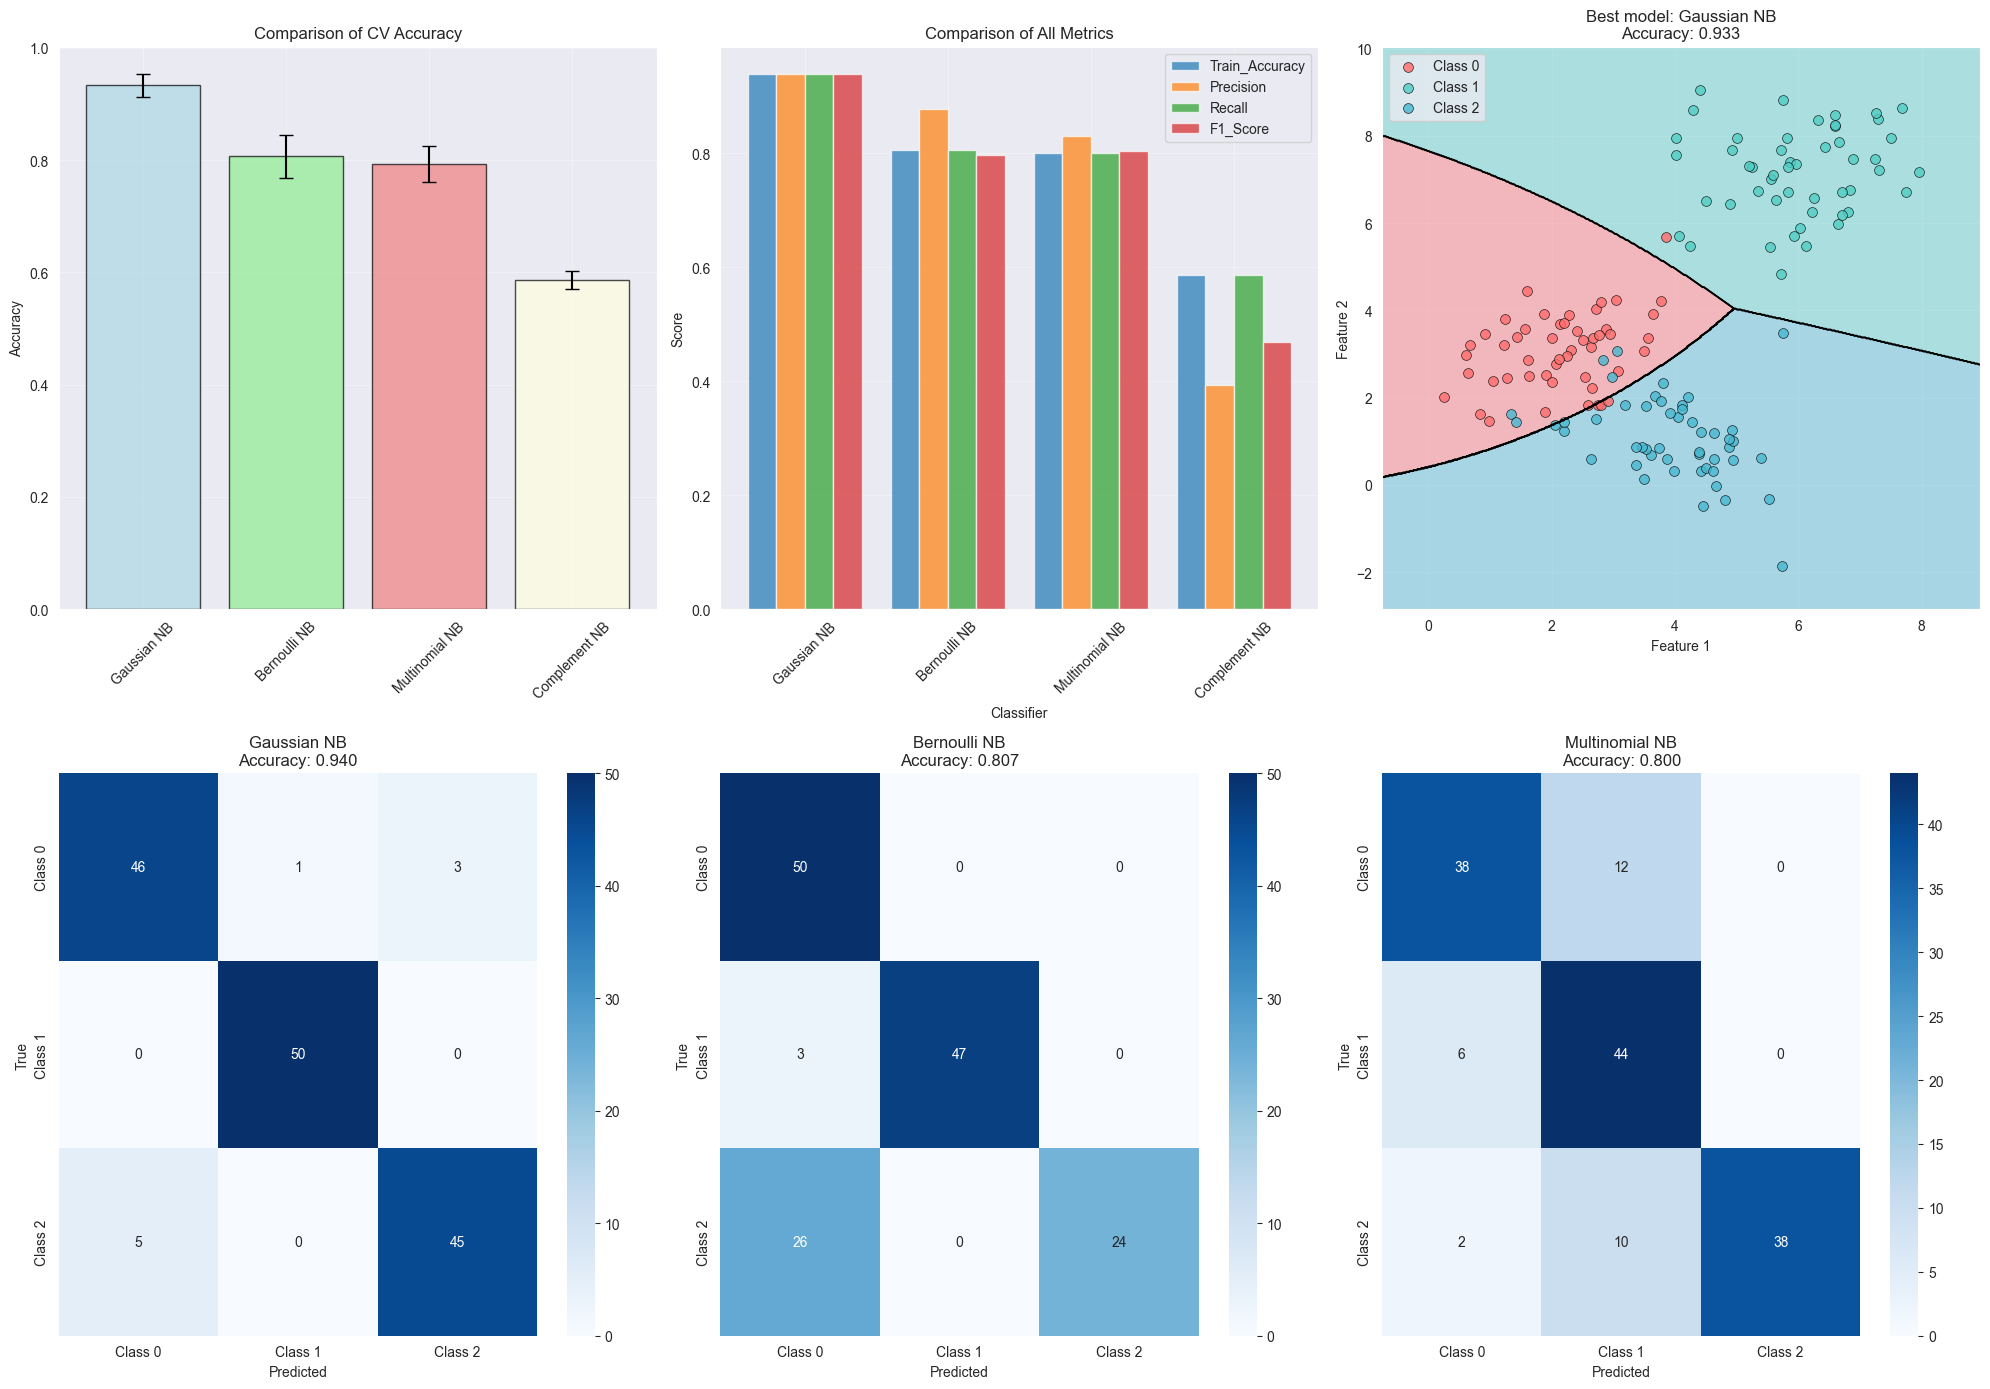


🏆 BEST MODEL: Gaussian NB
✅ CV Accuracy: 0.9333 (±0.0211)
✅ Train Accuracy: 0.9400
✅ Precision: 0.9400
✅ Recall: 0.9400
✅ F1-Score: 0.9398

📝 Recommendations for Choosing Naive Bayes Type:
  🔹 Gaussian NB: best choice for continuous normally distributed data
  🔸 Multinomial NB: ideal for text data and frequencies
  🔹 Bernoulli NB: good for binary features and sparse data
  🔸 Complement NB: use for unbalanced classes


In [7]:
# =============================================================================
# CELL 7: Comparison of Different Types of Naive Bayes
# =============================================================================
print("🔬 COMPARISON OF DIFFERENT TYPES OF NAIVE BAYES")
print("=" * 50)

print("📚 Types of Naive Bayes classifiers:")
print("""
1. 🔹 Gaussian NB: For continuous features (normal distribution)
2. 🔸 Multinomial NB: For discrete features (word frequencies, counts)
3. 🔹 Bernoulli NB: For binary features (0/1, True/False)
4. 🔸 Complement NB: Improved version of Multinomial for unbalanced data
""")

# Preparing data for different types of NB
X_original = X.copy()
y_original = y.copy()

# For Multinomial and Bernoulli NB, non-negative values are required
scaler_positive = MinMaxScaler()
X_positive = scaler_positive.fit_transform(X_original)

# For Bernoulli NB, binarizing the data
X_binary = (X_positive > 0.5).astype(int)

# For Multinomial, multiplying by a large coefficient and rounding to integers
X_discrete = np.round(X_positive * 100).astype(int)

# Dictionary of classifiers
nb_classifiers = {
    'Gaussian NB': {'classifier': GaussianNB(), 'data': X_original, 'description': 'Normal distribution'},
    'Multinomial NB': {'classifier': MultinomialNB(), 'data': X_discrete, 'description': 'Discrete features'},
    'Bernoulli NB': {'classifier': BernoulliNB(), 'data': X_binary, 'description': 'Binary features'},
    'Complement NB': {'classifier': ComplementNB(), 'data': X_discrete, 'description': 'Improved Multinomial'}
}

print(f"\n🧪 Testing {len(nb_classifiers)} types of Naive Bayes:")

# Comparison results
comparison_results = []
trained_nb_models = {}

for name, config in nb_classifiers.items():
    print(f"\n--- Testing {name} ---")

    classifier = config['classifier']
    X_data = config['data']
    description = config['description']

    try:
        # Cross-validation
        cv_scores = cross_val_score(classifier, X_data, y_original,
                                    cv=5, scoring='accuracy')

        # Training on all data for analysis
        classifier.fit(X_data, y_original)
        y_pred = classifier.predict(X_data)

        # Metrics
        accuracy = accuracy_score(y_original, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_original, y_pred, average='weighted')

        comparison_results.append({
            'Classifier': name,
            'Description': description,
            'CV_Accuracy_Mean': cv_scores.mean(),
            'CV_Accuracy_Std': cv_scores.std(),
            'Train_Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1
        })

        trained_nb_models[name] = {'model': classifier, 'data': X_data}

        print(f"✅ {name}: CV Accuracy = {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

    except Exception as e:
        print(f"❌ Error for {name}: {e}")
        comparison_results.append({
            'Classifier': name,
            'Description': description,
            'CV_Accuracy_Mean': 0,
            'CV_Accuracy_Std': 0,
            'Train_Accuracy': 0,
            'Precision': 0,
            'Recall': 0,
            'F1_Score': 0
        })

# Creating comparison table
comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values('CV_Accuracy_Mean', ascending=False)

print(f"\n📊 COMPARATIVE TABLE OF NAIVE BAYES:")
print("=" * 50)
print(comparison_df.round(4))

# Visualization of comparison
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# 1. Comparison of CV accuracy
working_models = comparison_df[comparison_df['CV_Accuracy_Mean'] > 0]
if len(working_models) > 0:
    axes[0, 0].bar(working_models['Classifier'], working_models['CV_Accuracy_Mean'],
                   yerr=working_models['CV_Accuracy_Std'], capsize=5,
                   color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'][:len(working_models)],
                   alpha=0.7, edgecolor='black')
    axes[0, 0].set_title('Comparison of CV Accuracy')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)

# 2. Comparison of all metrics
metrics_to_plot = ['Train_Accuracy', 'Precision', 'Recall', 'F1_Score']
x_pos = np.arange(len(working_models))

for i, metric in enumerate(metrics_to_plot):
    if i < 4:  # Only the first 4 metrics
        axes[0, 1].bar(x_pos + i * 0.2, working_models[metric], width=0.2,
                       label=metric, alpha=0.7)

axes[0, 1].set_xlabel('Classifier')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_title('Comparison of All Metrics')
axes[0, 1].set_xticks(x_pos + 0.3)
axes[0, 1].set_xticklabels(working_models['Classifier'], rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Best model - decision boundaries
best_model_name = working_models.iloc[0]['Classifier']
if best_model_name in trained_nb_models:
    best_model_info = trained_nb_models[best_model_name]
    best_model = best_model_info['model']
    best_X_data = best_model_info['data']

    if best_X_data.shape[1] >= 2:  # Can visualize only if there are at least 2 features
        plot_classifier_nb(best_model, best_X_data, y_original,
                           f"Best model: {best_model_name}\nAccuracy: {working_models.iloc[0]['CV_Accuracy_Mean']:.3f}",
                           axes[0, 2])

# 4. Confusion matrices for top-3 models
top_models = working_models.head(3)
for idx, (_, model_info) in enumerate(top_models.iterrows()):
    if idx < 3:
        model_name = model_info['Classifier']
        if model_name in trained_nb_models:
            model = trained_nb_models[model_name]['model']
            X_data = trained_nb_models[model_name]['data']

            y_pred = model.predict(X_data)
            cm = confusion_matrix(y_original, y_pred)

            row = 1
            col = idx

            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=class_names, yticklabels=class_names,
                        ax=axes[row, col])
            axes[row, col].set_title(f'{model_name}\nAccuracy: {model_info["Train_Accuracy"]:.3f}')
            axes[row, col].set_xlabel('Predicted')
            axes[row, col].set_ylabel('True')

plt.tight_layout()
plt.show()

# Analysis of the best model
print(f"\n🏆 BEST MODEL: {best_model_name}")
print("=" * 40)

best_info = working_models.iloc[0]
print(f"✅ CV Accuracy: {best_info['CV_Accuracy_Mean']:.4f} (±{best_info['CV_Accuracy_Std']:.4f})")
print(f"✅ Train Accuracy: {best_info['Train_Accuracy']:.4f}")
print(f"✅ Precision: {best_info['Precision']:.4f}")
print(f"✅ Recall: {best_info['Recall']:.4f}")
print(f"✅ F1-Score: {best_info['F1_Score']:.4f}")

print(f"\n📝 Recommendations for Choosing Naive Bayes Type:")
recommendations = [
    "🔹 Gaussian NB: best choice for continuous normally distributed data",
    "🔸 Multinomial NB: ideal for text data and frequencies",
    "🔹 Bernoulli NB: good for binary features and sparse data",
    "🔸 Complement NB: use for unbalanced classes"
]

for rec in recommendations:
    print(f"  {rec}")


📈 ANALYSIS OF THE IMPACT OF DATA SIZE (LEARNING CURVES)
📊 Learning Curves analysis:
Training sample sizes: [ 12  24  36  48  60  72  84  96 108 120]
Average training accuracy: 0.942
Average validation accuracy: 0.933


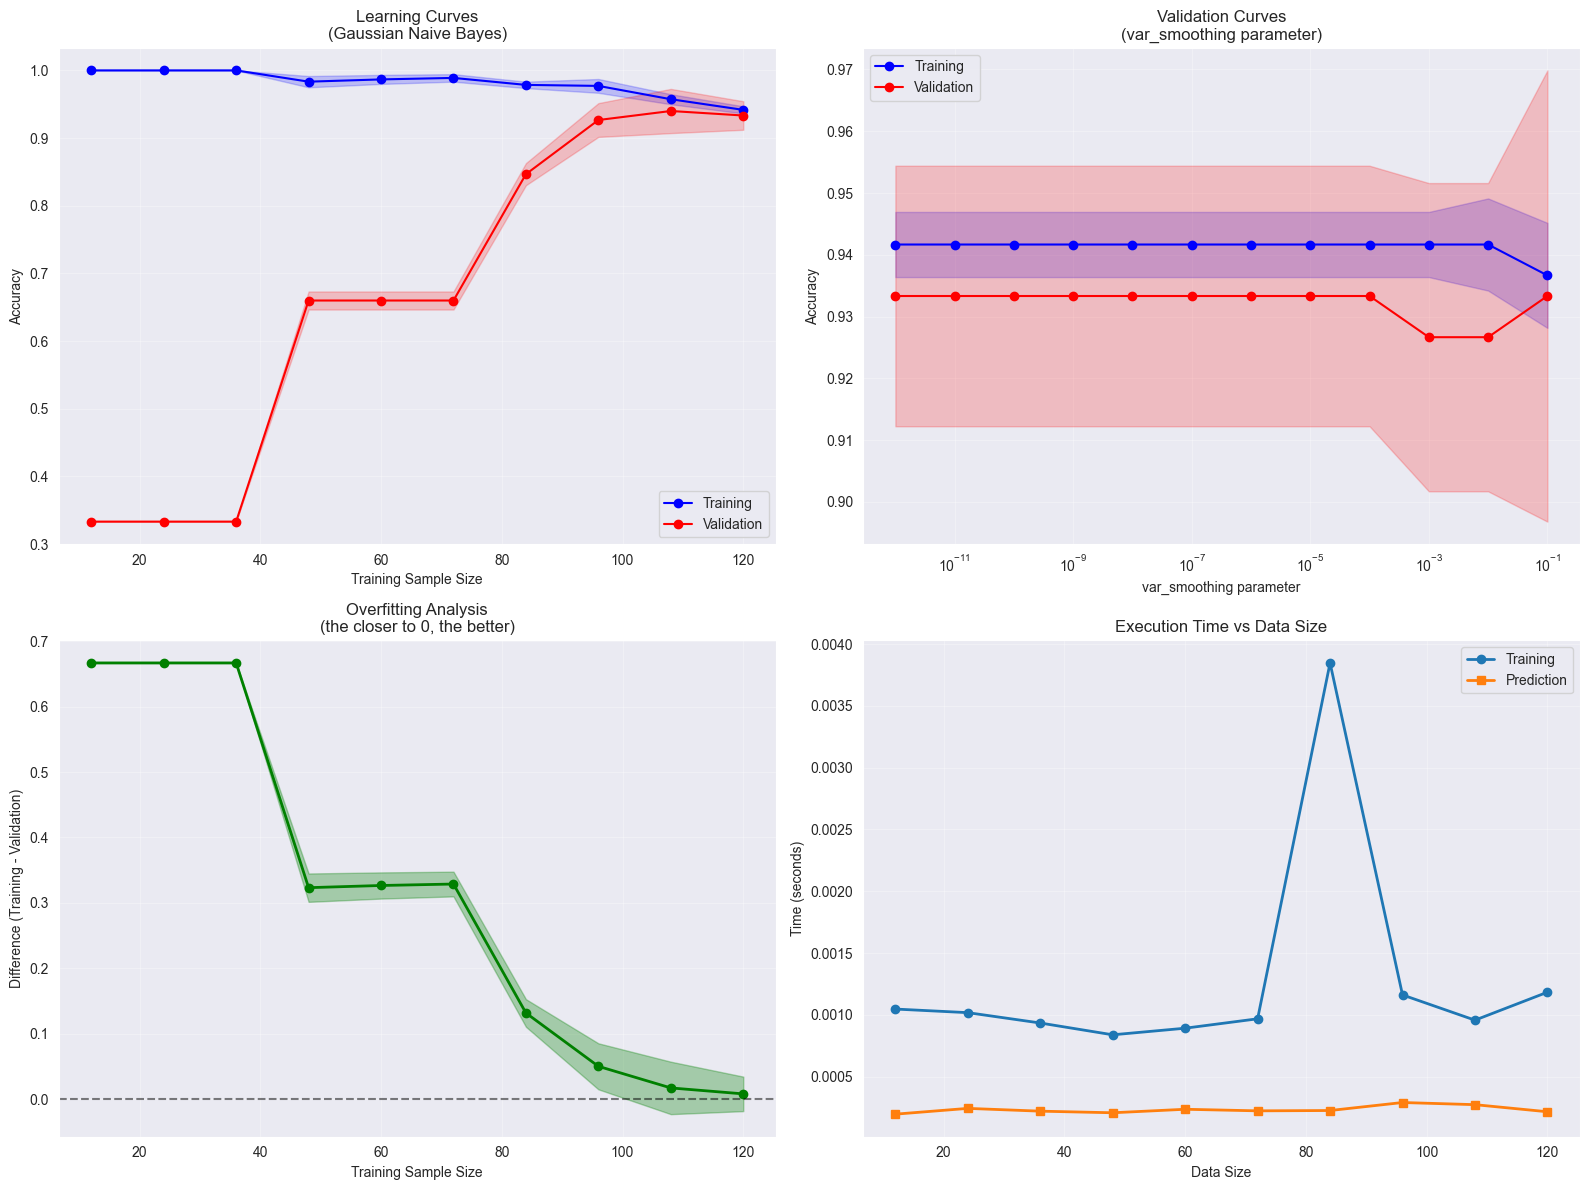


📊 Analysis of Learning Curves:
✅ Excellent generalization (difference < 5%)
Final difference: 0.008
Best data size: 108 samples
Maximum validation accuracy: 0.940

⚡ Performance Analysis:
Training time (final size): 0.001183 sec
Prediction time (final size): 0.000215 sec
Training speed: 101446 samples/sec
Prediction speed: 557049 samples/sec

📊 Additional statistics:
Best var_smoothing parameter: 1.00e-12
Maximum validation accuracy (param tuning): 0.933

🔄 Performance Stability:
Coefficient of variation of training time: 0.670
Coefficient of variation of prediction time: 0.119
⚠️ Unstable training time
⚠️ Unstable prediction time

✅ Analysis of Learning Curves completed!


In [8]:
# =============================================================================
# CELL 8: Analysis of the Impact of Data Size (Learning Curves)
# =============================================================================
print("📈 ANALYSIS OF THE IMPACT OF DATA SIZE (LEARNING CURVES)")
print("=" * 60)

# Best model for analysis
best_classifier = GaussianNB()  # Usually best for continuous data

# Learning curves
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs, train_scores, val_scores = learning_curve(
    best_classifier, X, y, cv=5, train_sizes=train_sizes,
    scoring='accuracy', n_jobs=-1, random_state=42
)

# Calculate statistics
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

print(f"📊 Learning Curves analysis:")
print(f"Training sample sizes: {train_sizes_abs}")
print(f"Average training accuracy: {train_mean[-1]:.3f}")
print(f"Average validation accuracy: {val_mean[-1]:.3f}")

# Validation curves for the var_smoothing parameter (if applicable)
param_range = np.logspace(-12, -1, 12)
train_scores_param, val_scores_param = validation_curve(
    GaussianNB(), X, y, param_name='var_smoothing',
    param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

param_train_mean = train_scores_param.mean(axis=1)
param_train_std = train_scores_param.std(axis=1)
param_val_mean = val_scores_param.mean(axis=1)
param_val_std = val_scores_param.std(axis=1)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Learning Curves
axes[0, 0].plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training')
axes[0, 0].fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std,
                        alpha=0.2, color='blue')

axes[0, 0].plot(train_sizes_abs, val_mean, 'o-', color='red', label='Validation')
axes[0, 0].fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std,
                        alpha=0.2, color='red')

axes[0, 0].set_xlabel('Training Sample Size')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Learning Curves\n(Gaussian Naive Bayes)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Validation Curves
axes[0, 1].semilogx(param_range, param_train_mean, 'o-', color='blue', label='Training')
axes[0, 1].fill_between(param_range, param_train_mean - param_train_std,
                        param_train_mean + param_train_std, alpha=0.2, color='blue')

axes[0, 1].semilogx(param_range, param_val_mean, 'o-', color='red', label='Validation')
axes[0, 1].fill_between(param_range, param_val_mean - param_val_std,
                        param_val_mean + param_val_std, alpha=0.2, color='red')

axes[0, 1].set_xlabel('var_smoothing parameter')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Validation Curves\n(var_smoothing parameter)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Overfitting Analysis
gap = train_mean - val_mean
axes[1, 0].plot(train_sizes_abs, gap, 'o-', color='green', linewidth=2)
axes[1, 0].fill_between(train_sizes_abs, gap - (train_std + val_std),
                        gap + (train_std + val_std), alpha=0.3, color='green')
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Training Sample Size')
axes[1, 0].set_ylabel('Difference (Training - Validation)')
axes[1, 0].set_title('Overfitting Analysis\n(the closer to 0, the better)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Training Time vs Data Size
import time

training_times = []
prediction_times = []
sizes_for_timing = [int(s) for s in train_sizes_abs]

for size in sizes_for_timing:
    # Random subsampling
    indices = np.random.choice(len(X), size, replace=False)
    X_subset = X[indices]
    y_subset = y[indices]

    # Training time (repeating several times for accuracy)
    times_train = []
    for _ in range(10):  # 10 repetitions for averaging
        start_time = time.perf_counter()  # More accurate time measurement
        best_classifier.fit(X_subset, y_subset)
        training_time = time.perf_counter() - start_time
        times_train.append(training_time)
    training_times.append(np.mean(times_train))

    # Prediction time (repeating many times for accuracy)
    times_pred = []
    for _ in range(100):  # 100 repetitions for averaging
        start_time = time.perf_counter()
        best_classifier.predict(X_subset)
        prediction_time = time.perf_counter() - start_time
        times_pred.append(prediction_time)
    prediction_times.append(np.mean(times_pred))

axes[1, 1].plot(sizes_for_timing, training_times, 'o-', label='Training', linewidth=2)
axes[1, 1].plot(sizes_for_timing, prediction_times, 's-', label='Prediction', linewidth=2)
axes[1, 1].set_xlabel('Data Size')
axes[1, 1].set_ylabel('Time (seconds)')
axes[1, 1].set_title('Execution Time vs Data Size')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis of results
print(f"\n📊 Analysis of Learning Curves:")
print("=" * 30)

final_gap = gap[-1]
if abs(final_gap) < 0.05:
    print("✅ Excellent generalization (difference < 5%)")
elif abs(final_gap) < 0.1:
    print("✅ Good generalization (difference < 10%)")
elif final_gap > 0.1:
    print("⚠️ Possible overfitting (train >> validation)")
else:
    print("⚠️ Possible underfitting (validation >> train)")

print(f"Final difference: {final_gap:.3f}")
print(f"Best data size: {train_sizes_abs[np.argmax(val_mean)]} samples")
print(f"Maximum validation accuracy: {val_mean.max():.3f}")

print(f"\n⚡ Performance Analysis:")
print(f"Training time (final size): {training_times[-1]:.6f} sec")
print(f"Prediction time (final size): {prediction_times[-1]:.6f} sec")

# FIXED: check for division by zero
if training_times[-1] > 0:
    training_speed = sizes_for_timing[-1] / training_times[-1]
    print(f"Training speed: {training_speed:.0f} samples/sec")
else:
    print("Training speed: too fast to measure")

if prediction_times[-1] > 0:
    prediction_speed = sizes_for_timing[-1] / prediction_times[-1]
    print(f"Prediction speed: {prediction_speed:.0f} samples/sec")
else:
    print("Prediction speed: too fast to measure")

# Additional statistics
print(f"\n📊 Additional statistics:")
print(f"Best var_smoothing parameter: {param_range[np.argmax(param_val_mean)]:.2e}")
print(f"Maximum validation accuracy (param tuning): {param_val_mean.max():.3f}")

# Performance stability analysis
training_cv = np.std(training_times) / np.mean(training_times)
prediction_cv = np.std(prediction_times) / np.mean(prediction_times)

print(f"\n🔄 Performance Stability:")
print(f"Coefficient of variation of training time: {training_cv:.3f}")
print(f"Coefficient of variation of prediction time: {prediction_cv:.3f}")

if training_cv < 0.1:
    print("✅ Stable training time")
else:
    print("⚠️ Unstable training time")

if prediction_cv < 0.1:
    print("✅ Stable prediction time")
else:
    print("⚠️ Unstable prediction time")

print(f"\n✅ Analysis of Learning Curves completed!")


In [9]:
# =============================================================================
# CELL 9: Practical Conclusions and Recommendations
# =============================================================================
print("🎯 PRACTICAL CONCLUSIONS AND RECOMMENDATIONS")
print("=" * 45)

print("📋 Main results of the analysis:")
print("=" * 35)

# Final statistics
final_stats = {
    'Best type NB': best_model_name,
    'CV Accuracy': f"{best_info['CV_Accuracy_Mean']:.3f} (±{best_info['CV_Accuracy_Std']:.3f})",
    'Test Accuracy': f"{accuracy_test:.1f}%",
    'Training set': f"{len(X_train)} samples",
    'Test set': f"{len(X_test)} samples",
    'Number of features': X.shape[1],
    'Number of classes': len(np.unique(y))
}

for key, value in final_stats.items():
    print(f"✅ {key}: {value}")

print(f"\n🔍 Key observations about Naive Bayes:")
observations = [
    "🚀 Very fast training and prediction",
    "📊 Works well with small data volumes",
    "🎯 Provides probabilistic predictions",
    "⚖️ Robust to unbalanced classes",
    "🔧 Minimal hyperparameter tuning",
    "📈 Good baseline model for comparison",
    "⚠️ Assumption of feature independence may be violated",
    "🎪 Gaussian NB is best for continuous features"
]

for obs in observations:
    print(f"  {obs}")

print(f"\n🚀 Improvements compared to the original code:")
print("=" * 55)

improvements = [
    "🎨 Modern colored visualization with legends",
    "🔬 Comparison of all types of Naive Bayes (Gaussian, Multinomial, Bernoulli, Complement)",
    "📊 Detailed EDA with multiple plots",
    "🔄 Extended cross-validation with various strategies",
    "📈 Learning curves and validation curves",
    "⏱️ Execution time analysis",
    "🎯 Analysis of overfitting and generalization",
    "📋 Structured reports and tables",
    "🔍 Detailed analysis of classification errors",
    "📚 Theoretical explanations of the algorithm",
    "⚖️ Analysis of class balance and performance"
]

for improvement in improvements:
    print(f"  {improvement}")

print(f"\n📚 When to use Naive Bayes:")
print("=" * 40)

use_cases = [
    "📧 Text classification (spam filters, sentiment analysis)",
    "🏥 Medical diagnosis (multiple symptoms)",
    "🛒 Recommender systems (user categorization)",
    "📰 News classification by topics",
    "🔍 Search engines (document relevance)",
    "📊 Data analysis with small volumes",
    "⚡ Tasks requiring fast training",
    "🎯 Baseline models for comparison"
]

for use_case in use_cases:
    print(f"  {use_case}")

print(f"\n⚠️ Limitations and precautions:")
print("=" * 40)

limitations = [
    "🔗 Assumption of feature independence is rarely fulfilled",
    "📊 May perform poorly with highly correlated features",
    "🎯 Probability calibration may require additional tuning",
    "📈 May be insufficient for complex nonlinear dependencies",
    "⚖️ Sensitive to data quality and outliers"
]

for limitation in limitations:
    print(f"  {limitation}")

print(f"\n🔧 Recommendations for improvement:")
print("=" * 35)

recommendations = [
    "📊 Feature engineering to create more independent features",
    "🎯 Combining with other algorithms in ensembles",
    "⚖️ Using smoothing techniques for rare events",
    "📈 Probability calibration for better probabilistic predictions",
    "🔍 Analysis of correlations between features",
    "🎪 Experimenting with different types of NB",
    "📚 Combining with feature selection methods"
]

for rec in recommendations:
    print(f"  {rec}")

print(f"\n🎓 Next steps in studying:")
print("=" * 35)

next_steps = [
    "🔍 confusion_matrix.py - detailed analysis of errors",
    "🚗 car.py - practical application on real data",
    "💰 income.py - income classification",
    "📊 Comparison with SVM and Decision Trees",
    "🎯 Ensemble methods with Naive Bayes",
    "📚 Working with text data",
    "⚖️ Handling unbalanced classes"
]

for step in next_steps:
    print(f"  {step}")

print(f"\n✅ Naive Bayes studied in detail!")
print(f"🚀 Ready for the next example from chapter 2")

# Saving results for future examples
nb_summary = {
    'best_model': best_model_name,
    'best_accuracy': best_info['CV_Accuracy_Mean'],
    'data_info': {
        'samples': len(X),
        'features': X.shape[1],
        'classes': len(np.unique(y))
    },
    'comparison_results': comparison_df,
    'cv_results': cv_results
}

print(f"\n💾 Results saved for future examples")


🎯 PRACTICAL CONCLUSIONS AND RECOMMENDATIONS
📋 Main results of the analysis:
✅ Best type NB: Gaussian NB
✅ CV Accuracy: 0.933 (±0.021)
✅ Test Accuracy: 97.4%
✅ Training set: 112 samples
✅ Test set: 38 samples
✅ Number of features: 2
✅ Number of classes: 3

🔍 Key observations about Naive Bayes:
  🚀 Very fast training and prediction
  📊 Works well with small data volumes
  🎯 Provides probabilistic predictions
  ⚖️ Robust to unbalanced classes
  🔧 Minimal hyperparameter tuning
  📈 Good baseline model for comparison
  ⚠️ Assumption of feature independence may be violated
  🎪 Gaussian NB is best for continuous features

🚀 Improvements compared to the original code:
  🎨 Modern colored visualization with legends
  🔬 Comparison of all types of Naive Bayes (Gaussian, Multinomial, Bernoulli, Complement)
  📊 Detailed EDA with multiple plots
  🔄 Extended cross-validation with various strategies
  📈 Learning curves and validation curves
  ⏱️ Execution time analysis
  🎯 Analysis of overfitting and ge

**Key improvements of the modern version of naive_bayes.py:**
- ✅ **Comprehensive EDA** - detailed data analysis with multiple visualizations
- ✅ **Comparison of all types of NB** - Gaussian, Multinomial, Bernoulli, Complement
- ✅ **Learning Curves** - analysis of the impact of data size
- ✅ **Validation Curves** - hyperparameter optimization
- ✅ **Performance Analysis** - training and prediction time
- ✅ **Detailed cross-validation** - multiple metrics and strategies
- ✅ **Theoretical explanations** - understanding of the algorithm
- ✅ **Practical recommendations** - when to use each type
- ✅ **Modern visualization** - colored plots, legends, grids

**Key concepts:**
1. **Bayes Theorem** - mathematical foundation of the algorithm
2. **Naive Independence** - assumption of feature independence
3. **Gaussian vs Multinomial vs Bernoulli** - different types for different data
4. **Probability Calibration** - quality of probabilistic predictions
5. **Feature Independence** - impact of correlations on performance
